In [1]:
# Impoting the Libraries
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Importing the Uber data set
uber = pd.read_csv("Uber Request Data.csv")
uber.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47
2,1807,City,1.0,Trip Completed,12/7/2016 9:17,12/7/2016 9:58
3,2532,Airport,1.0,Trip Completed,12/7/2016 21:08,12/7/2016 22:03
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47


In [3]:
# First checking the data types of each column 
uber.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
Request id           6745 non-null int64
Pickup point         6745 non-null object
Driver id            4095 non-null float64
Status               6745 non-null object
Request timestamp    6745 non-null object
Drop timestamp       2831 non-null object
dtypes: float64(1), int64(1), object(4)
memory usage: 316.2+ KB


In [4]:
# Changing data types as per need
uber['Request timestamp'] = uber['Request timestamp'].astype(str)
uber['Request timestamp'] = uber['Request timestamp'].str.replace('/','-')
uber['Request timestamp'] = pd.to_datetime(uber['Request timestamp'],dayfirst=True)

uber['Drop timestamp'] = uber['Drop timestamp'].astype(str)
uber['Drop timestamp'] = uber['Drop timestamp'].str.replace('/','-')
uber['Drop timestamp'] = pd.to_datetime(uber['Drop timestamp'],dayfirst=True)

In [5]:
# Making sure the data types are changed as our need
uber.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
Request id           6745 non-null int64
Pickup point         6745 non-null object
Driver id            4095 non-null float64
Status               6745 non-null object
Request timestamp    6745 non-null datetime64[ns]
Drop timestamp       2831 non-null datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(1), object(2)
memory usage: 316.2+ KB


In [6]:
uber.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47


In [7]:
# Checking NULL values in the Data set
print(uber.isnull().sum())

Request id              0
Pickup point            0
Driver id            2650
Status                  0
Request timestamp       0
Drop timestamp       3914
dtype: int64


In [8]:
# Getting how much percentage of values are missing
round(uber.isnull().sum()/(len(uber.index))*100,2)

Request id            0.00
Pickup point          0.00
Driver id            39.29
Status                0.00
Request timestamp     0.00
Drop timestamp       58.03
dtype: float64

As we can see above, data is missing in Driver id and Drop timestamp. This is because those rides were cancelled.


In [9]:
# Checking if there is any duplicate row in the data
sum(uber.duplicated(subset='Request id')) == 0

True

In [10]:
# We want the time at which request was made.So, we will extract this from request timestamp
Request_time = uber["Request timestamp"].dt.hour
uber["Request_time"] = Request_time
uber.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Request_time
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00,11
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,17
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,9
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00,21
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,8


In [11]:
# Checking that at particular Request time the trip was completed or not
uber["Serviced"] = uber["Status"].apply(lambda x: "Yes" if x=="Trip Completed" else "No")
uber.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Request_time,Serviced
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00,11,Yes
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,17,Yes
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,9,Yes
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00,21,Yes
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,8,Yes


In [12]:
# Creating new column named "time slot" based on request hour 
def time_slot(x):
    if x<5:
        return "Pre_Morning"
    elif 5 <= x <= 9:
        return "Morning_Rush"
    elif 10 <= x <= 16:
        return "Day_Time"
    elif 17 <= x <= 21:
        return "Evening_Rush"
    else:
        return "Late_Night"
    
uber["Time slot"] = uber.Request_time.apply(lambda x: time_slot(x))
uber.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Request_time,Serviced,Time slot
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00,11,Yes,Day_Time
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,17,Yes,Evening_Rush
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,9,Yes,Morning_Rush
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00,21,Yes,Evening_Rush
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,8,Yes,Morning_Rush


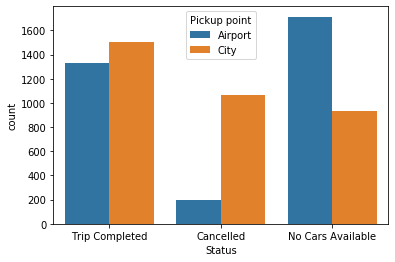

In [13]:
# Frequency of requests that get cancelled, show no cars availabe and Trip completed at both the pickup points
sns.countplot(x = "Status", hue = "Pickup point", data = uber)

From above graph we can say that most of the trips from city were cancelled and there were no cars available at the airport 

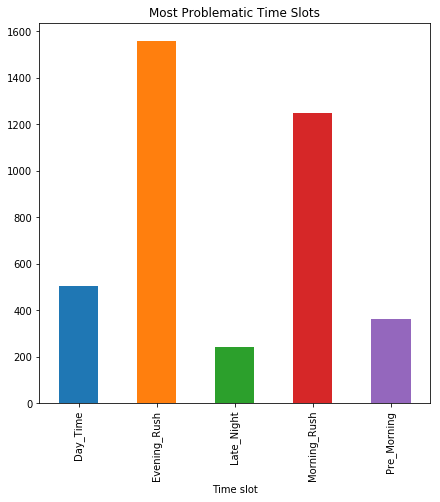

In [21]:
# Now we will see what time slot cause the highest problems
uber[(uber.Serviced=="No")].groupby(['Time slot']).size().plot(kind="bar",stacked=True,figsize=(7, 7),title="Most Problematic Time Slots")
plt.show()

As we can see Moring_Rush and Evening_Rush are most problamatic time slots

Text(0.5, 1.0, 'Number of Requests made in each hour')

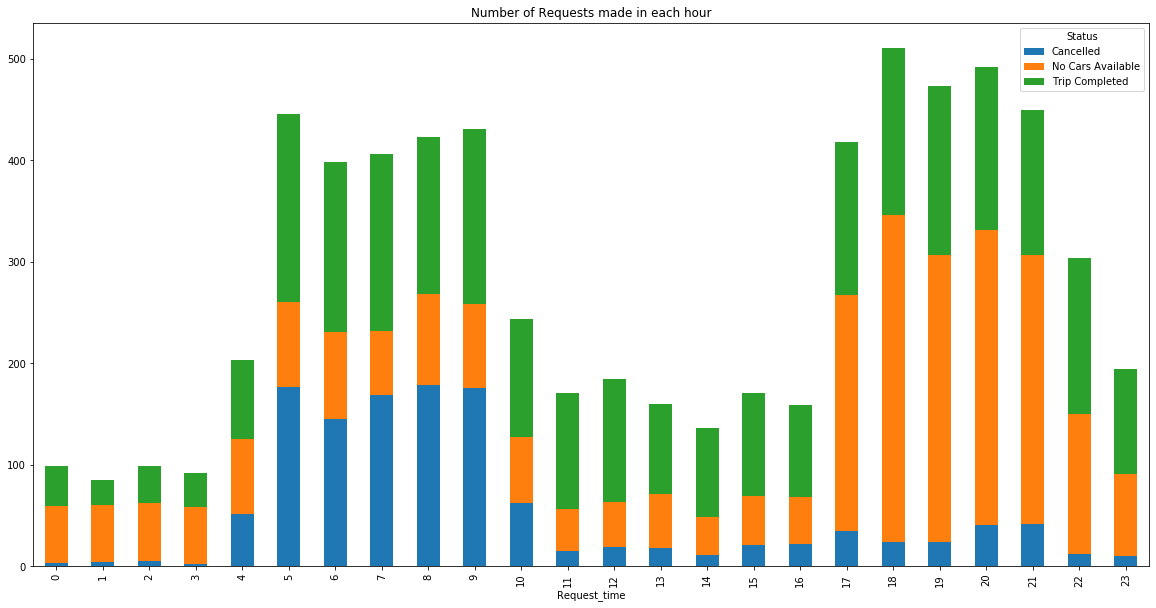

In [14]:
# Number of Requests per hour
uber.groupby(['Request_time','Status']).size().unstack().plot(kind='bar', stacked=True,figsize=(20, 10))
plt.title('Number of Requests made in each hour')

From above figure we can say that from 5 to 9 (Morning_Rush) most of the trips were cancelled and from 17 to 21 (Evening_Rush) there were no cars available 

Text(0.5, 1.0, 'Time slots when the highest Gap exists')

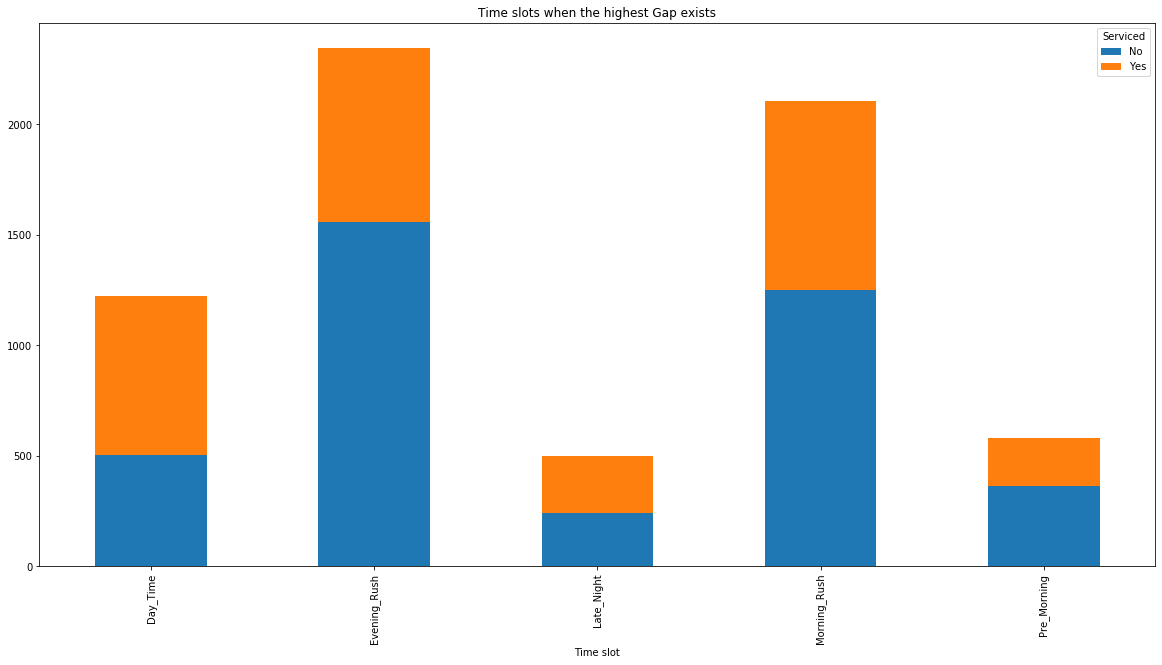

In [15]:
# Time slots when the highest Gap exists
uber.groupby(['Time slot','Serviced']).size().unstack().plot(kind='bar', stacked=True,figsize=(20, 10))
plt.title('Time slots when the highest Gap exists')

From the above graph we can say that Moring_Ruch and Evening_Rush have the highest gap


Text(0.5, 1.0, 'Supply-Demand Gap from City to Airport')

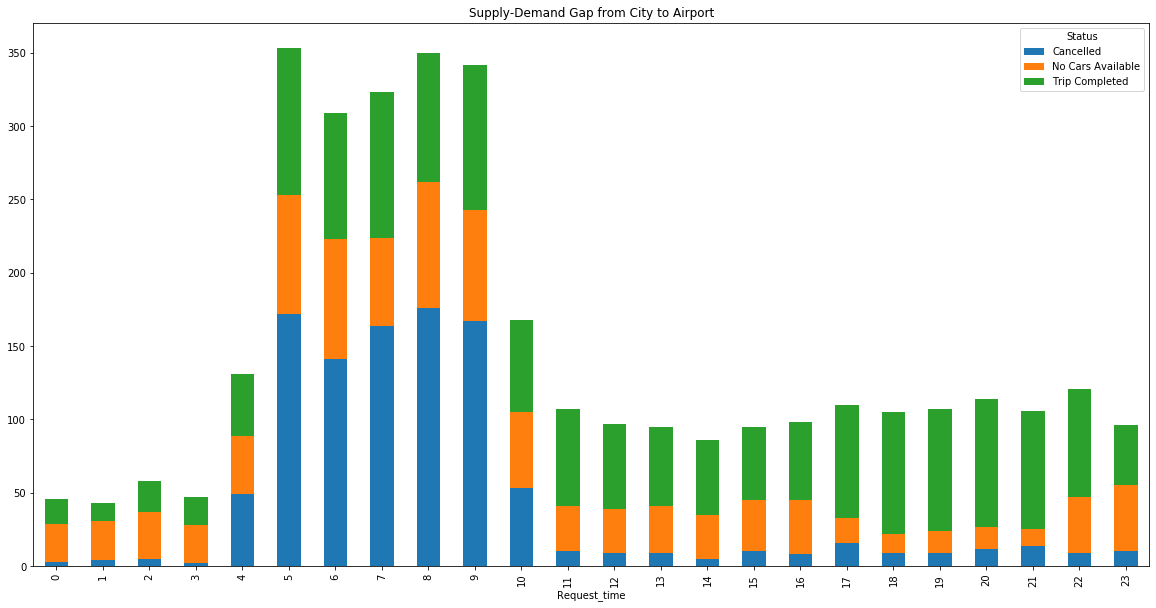

In [16]:
# Supply-Demand Gap from City to Airport
uber[(uber['Pickup point']=="City")].groupby(['Request_time','Status']).size().unstack().plot(kind='bar', stacked=True,figsize=(20, 10))
plt.title('Supply-Demand Gap from City to Airport')

We can say that the supply-demand gap from city to airport is beacuse the trips were cancelled

Text(0.5, 1.0, 'Supply-Demand Gap from Airport to City')

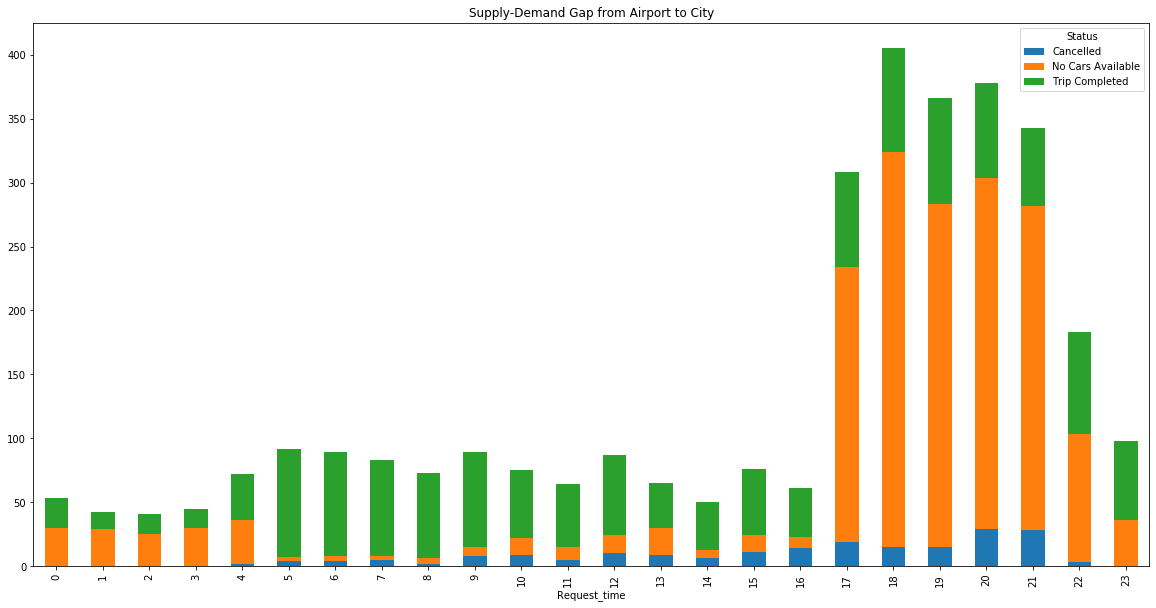

In [17]:
# Supply-Demand Gap from Airport to City
uber[(uber['Pickup point']=="Airport")].groupby(['Request_time','Status']).size().unstack().plot(kind='bar', stacked=True,figsize=(20, 10))
plt.title('Supply-Demand Gap from Airport to City')

We can say that the supply-demand gap from airport to city is due to no cars available 

## Resason for Supply-Demand Gap
1) Pickup point is City: The supply-demand gap is higher at the time slot Morning_Rush(5 to 9) because the trips were cancelled by the drivers due to high waiting time for the next trip.<br>
2) Pickup point is Airport : The supply-demand gap is higher at the time slot Evening_Rush(17 to 21) because of no cars available due to lack of cars availability.

## Ways to resolve the supply-demand gap
1) Pickup point is City: Here the most of the rides were cancelled by the drivers.So,We can increase the fare of the trip to airport.By doing this the driver will not reject the request because he will get more money from that trip.<br>
2) Pickup point is Airport: Here the problem was due to lack of cars availability. There are two things we can do here, First is we can increase the fare of trips from Airport to City and Second we can introduce the cab sharing option which will decrease the gap by providing service to more people even with less number of cars availability.